In [1]:
import numpy as np
import matplotlib.pyplot as plt

import json
from scipy.integrate import simps
import os
from glob  import glob

In [2]:
def load_json(path):
    with open(path, 'r') as f:
        data = json.load(f)
    return data

In [3]:

def AUCError(errors, failureThreshold=0.08, step=0.0001, showCurve=False):
    nErrors = len(errors)
    xAxis = list(np.arange(0., failureThreshold + step, step))
    ced = [float(np.count_nonzero([errors <= x])) / nErrors for x in xAxis]
    AUC = simps(ced, x=xAxis) / failureThreshold
    failureRate = 1. - ced[-1]
    print("AUC @ {0}: {1}".format(failureThreshold, np.round(AUC, 3)))
    print("Failure rate: {0}".format(np.round(failureRate, 3)))
    if showCurve:
        fig, ax = plt.subplots(figsize=(10,8))
        plt.title('Area Under Curve')
        plt.xlabel('Normalized Localization Error(%)',  fontsize=12)
        plt.ylabel('Cumulative Error Distribution',  fontsize=12)
        plt.ylim([0, 1])
        plt.plot(np.asarray(xAxis) * 100, ced, color='red')
        plt.grid()
        plt.show()

----------------------------------------------------------------------
offsetv3.json
AUC @ 0.08: 0.327
Failure rate: 0.263
----------------------------------------------------------------------
old.json
AUC @ 0.08: 0.082
Failure rate: 0.663
----------------------------------------------------------------------
offsetv1.json
AUC @ 0.08: 0.267
Failure rate: 0.35


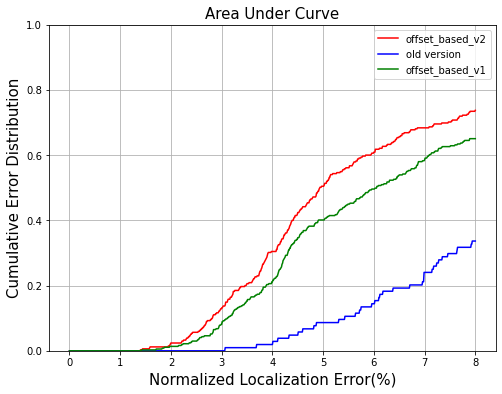

In [4]:
colors = ['red', 'blue', 'green']
fig, ax = plt.subplots(figsize=(8,6))
failureThreshold=0.08
step=0.0001
lb_names = ['offset_based_v2', 'old version', "offset_based_v1"]
anno_root = '/aidata/anders/objects/landmarks/metrics/TEST'
anno_paths = glob((os.path.join(anno_root, '*.json')))

for i, path in enumerate(anno_paths):              
    annos = load_json(path)
    errors = np.asarray(annos['nle'])
    num_samples = annos['num_samples']
    interocular = annos['interocular']
    nErrors = len(errors)
    xAxis = list(np.arange(0., failureThreshold + step, step))
    ced = [float(np.count_nonzero([errors <= x])) / nErrors for x in xAxis]
    AUC = simps(ced, x=xAxis) / failureThreshold
    failureRate = 1. - ced[-1]
    print('-' * 70)
    print(path.split('/')[-1])
    print("AUC @ {0}: {1}".format(failureThreshold, np.round(AUC, 3)))
    print("Failure rate: {0}".format(np.round(failureRate, 3)))
    plt.plot(np.asarray(xAxis) * 100, ced, color=colors[i], label=lb_names[i])
plt.ylim([0, 1])
plt.title('Area Under Curve', fontsize=15)
plt.xlabel('Normalized Localization Error(%)',  fontsize=15)
plt.ylabel('Cumulative Error Distribution',  fontsize=15)
plt.grid()
plt.legend()
plt.show()
    


In [15]:
# setting 
import matplotlib.colors as mcolors
clc_names = ['red', 'black', 'blue', 'brown', 'green']
NLE_names = ["Auxiliary and Penalized loss", "Base", "Attention-based"]
failureThreshold=0.08
step=0.0001
anno_root = '/aidata/anders/objects/landmarks/metrics/WFLW'
anno_paths = glob((os.path.join(anno_root, '*.json')))


AUC @ 0.08: 0.413
Failure rate: 0.229
Auxiliary and Penalized loss
AUC @ 0.08: 0.409
Failure rate: 0.221
Base
AUC @ 0.08: 0.392
Failure rate: 0.237
Attention-based


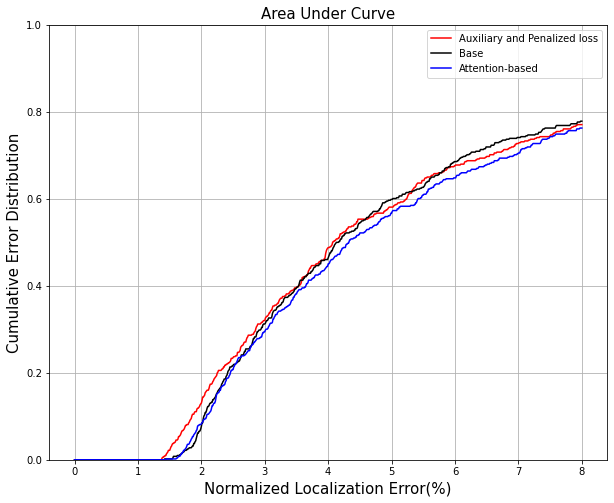

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
for i, path in enumerate(anno_paths):              
    annos = load_json(path)
    errors = np.asarray(annos['nle'])
    num_samples = annos['num_samples']
    interocular = annos['interocular']
    if interocular ==0:
        continue
    nErrors = len(errors)
    xAxis = list(np.arange(0., failureThreshold + step, step))
    ced = [float(np.count_nonzero([errors <= x])) / nErrors for x in xAxis]
    AUC = simps(ced, x=xAxis) / failureThreshold
    failureRate = 1. - ced[-1]
    print("AUC @ {0}: {1}".format(failureThreshold, np.round(AUC, 3)))
    print("Failure rate: {0}".format(np.round(failureRate, 3)))
    print(NLE_names[i])
    plt.plot(np.asarray(xAxis) * 100, ced, color=clc_names[i], label=NLE_names[i])
plt.ylim([0, 1])
plt.title('Area Under Curve', fontsize=15)
plt.xlabel('Normalized Localization Error(%)',  fontsize=15)
plt.ylabel('Cumulative Error Distribution',  fontsize=15)
plt.grid()
plt.legend()
plt.show()
    